# Работа с дисбалансированными выборками (imbalanced data)

- Говорить о дисбалансированной выборке можно только в контексте задачи классификации. 
- Дисбалансированной называется выборка, в которой мощности классов целевой переменной значительно различаются.
- Для оценки дисбаланса вводится **"степень дисбаланса" (imbalance ratio)** - отношение мощностей "маленького" (minor) и "большого" (major) классов:

$$ \text{imbalance ratio (IR)} = \frac{len(Y_{minor})}{len(Y_{major})} $$

- Дисбалансированной считается выборка, в которой хотя бы для двух классов **"степень дисбаланса"** составляет не более 1:10.
- Дисбалансированные выборки часто встречаются в задачах бинарной классификации:
    - Значение "1" целевого признака интерпретируется как определенное событие.
    - Значение "0" целевого признака интерпретируется как отсутствие события.
    - Если события происходят редко, то количество "1" существенно меньше количества "0".
    - На 100 отрицательных событий в выборке может присутствовать, например, не более 10 положительных событий.

**Почему дисбалансированная выборка может создавать проблемы при классификации?**

1. Малое количество объектов, соответствующих "маленькому" (minor) классу. 
    - Малое не в смысле процентного соотношения, а именно в смысле реального количества объектов. Например, для 5 объектов из 1000 классификатору будет сложно построить модель. 
    - Но если размер выборки пропорционально увеличить в 100 раз, то для 500 объектов из 100 000 классификатор с большей вероятностью постороит успешную модель.
    - Таким образом, чем больше размер выборки, тем в меньшей степени дисбаланс классов может влиять на построение модели. Проблема состоит не в значительной "степени дисбаланса", а в том, что объектов minor-класса слишком мало для успешного построения модели.
    
2. Разделимость классов. 
    - Если объекты выборки, соответствующие классам, линейно разделимы, то, с большой вероятностью, модель успешно построится даже при сильном дисбалансе классов.
    - В случае сложной разделяющей поверхности, дисбаланс классов может создавать дополнительные проблемы при ее построении.
    
3. Внутриклассовый дисбаланс (within-class imbalance), обусловленный сложной топологией данных.
    - Minor-класс может состоять из отдельных кластеров, размеры кластеров могут различаться. Необходимо строить разделяющую поверхность, которая будет учитывать все кластеры.
    
Пример показан на следующем рисунке:    

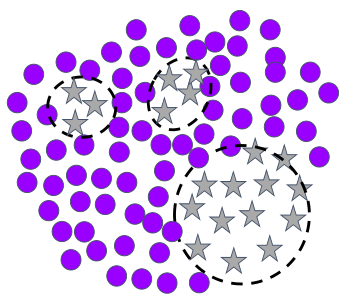

In [1]:
from IPython.display import Image
Image('img/wci.png', width='30%')

**Группы методов для работы с дисбалансированными выборками:** 

- Under-sampling - уменьшение количества объектов доминирующего класса.
- Over-sampling - увеличение количества объектов minor-класса.
- Одновременное использование Under-sampling и Over-sampling.
- Ансамблевые методы, построенные с учетом дисбалансированных выборок.

Большинство методов подходят для многоклассовой классификации и работают по схеме [One vs Rest.](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html)

Для работы с дисбалансированными выборками используется библиотека  [imbalanced-learn.](https://imbalanced-learn.org/)

## Генерация выборки

Библиотека imbalanced-learn также содержит наборы дисбалансированных датасетов и  функции для генерации собственных дисбалансированных датасетов - https://imbalanced-learn.org/stable/datasets/index.html

Дисбалансированные датасеты также могут быть сгенерированы с помощью функции [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) библиотеки scikit-learn. Параметр `weights` позволяет задавать imbalance ratio. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import InstanceHardnessThreshold

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import ADASYN

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier

In [3]:
def make_data(sep):
    """
    sep - задает степень отделенности классов друг от друга
    """
    
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.95],
                           class_sep=sep,
                           random_state=33)
    
    # Преобразуем в pandas DataFrame
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

Размеры классов:
0    947
1     53
dtype: int64


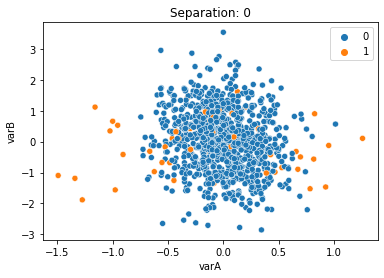

Размеры классов:
0    947
1     53
dtype: int64


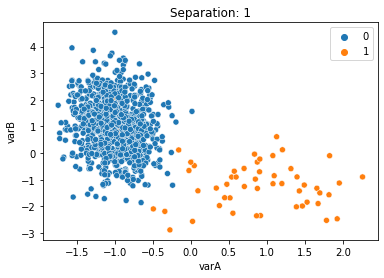

Размеры классов:
0    947
1     53
dtype: int64


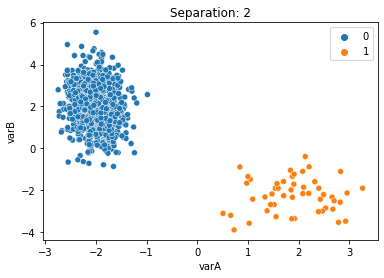

In [4]:
# демонстрация работы параметра sep
for sep in [0, 1, 2]:
    X, y = make_data(sep)
    print('Размеры классов:')
    print(y.value_counts())
    sns.scatterplot(data=X, x="varA", y="varB", hue=y)
    plt.title('Separation: {}'.format(sep))
    plt.show()

In [5]:
orig_data_X, orig_data_y = make_data(sep=0)

In [6]:
orig_data_y.value_counts()

0    947
1     53
dtype: int64

In [7]:
def show_sampled_scatter(orig_data_X, orig_data_y, sampled_data_X, sampled_data_y, title_2):
    
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title('Исходный датасет')
    sns.scatterplot(data=orig_data_X, x="varA", y="varB", hue=orig_data_y, ax=ax1)
    # второй график
    ax2.set_title(title_2)
    sns.scatterplot(data=sampled_data_X, x="varA", y="varB", hue=sampled_data_y, ax=ax2)
    plt.show()    

## [Группа методов Under-sampling](https://imbalanced-learn.org/stable/under_sampling.html)

**Under-sampling - уменьшение количества объектов доминирующего класса.**

На первый взгляд может показаться, что методы данной группы являются второстепенными по отношению к Over-sampling. Ведь основная проблема состоит в нехватке объектов minor-класса. Поможет ли уменьшение количества объектов major-класса?

Методы Under-sampling имеет смысл применять в ситуациях, когда количество объектов minor-класса не является критически малым, но слишком большое количество объектов major-класса оказывает отрицательное влияние на качество классификации. Если осуществить "прореживание" объектов major-класса, то качество классификации может улучшиться.

К группе Under-sampling относится довольно много методов. Они реализованы в библиотеке [imbalanced-learn.](https://imbalanced-learn.org/)

Методы Under-sampling можно разделить на две группы:
- Fixed - методы, которые оставляют требуемое соотношение $K_{Fixed}$ количеств объектов minor- и major-классов ($IR=K_{Fixed}$). Чаще всего выбирается $K_{Fixed}=1$.
- Cleaning - методы, которые уменьшают количество объектов major-класса на основании каких-либо критериев.

### Random Under-sampling

Метод группы Fixed.

Объекты major-класса удаляются случайным образом, пока не выполнится условие $IR=K_{Fixed}$.

**Преимущества:**
- Простой и быстрый метод.

**Недостатки:**
- Могут удаляться важные для классификации объекты, например те, которые могли бы быть "опорными векторами" в методе SVM.

**Реализация:** с использованием класса [RandomUnderSampler.](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

In [8]:
randomUnderSampler = RandomUnderSampler(sampling_strategy='auto', random_state=1, replacement=True)  
randomUnderSampler_X, randomUnderSampler_y = randomUnderSampler.fit_resample(orig_data_X, orig_data_y)

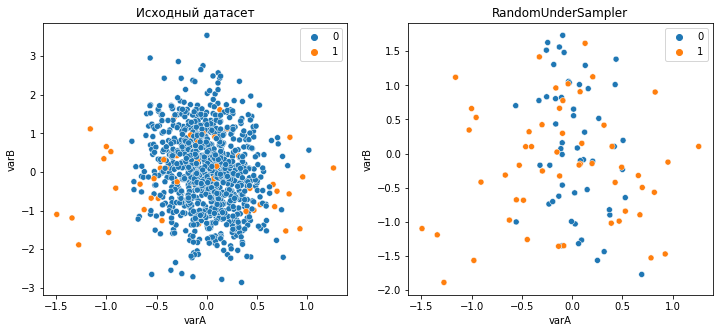

In [9]:
show_sampled_scatter(orig_data_X, orig_data_y, randomUnderSampler_X, randomUnderSampler_y, 'RandomUnderSampler')

In [10]:
randomUnderSampler_y.value_counts()

1    53
0    53
dtype: int64

### Condensed Nearest Neighbours (CNN)

Метод группы Cleaning.

1. Перенос minor-класса в отдельную группу G. 
2. Добавление к группе G одного объекта major-класса.
3. Использование группы G как обучающей выборки для KNN (K=1).
4. Выбор одного объекта obj из major-класса, при этом obj не включен в группу G.
5. Предсказание класса для obj с помощью обученной модели KNN.
6. Если предсказание корректно, то возврат к шагу 4 (игнорируем объект obj).
7. Если предсказание ошибочно, то добавление объекта obj в группу G и  возврат к шагу 3.
8. Повторение действий для всех объектов major-класса. Объекты major-класса или игнорируются или добавляются в группу G. После завершения группа G является "прореженным" датасетом.


**Преимущества:**
- Оставляет объекты на границе классов. Гипотетически сохраняет именно "опорные" вектора.

**Недостатки:**
- Может добавлять "зашумленные" объекты.
- Низкая скорость работы за счет постоянного использования модели KNN.

**Реализация:** с использованием класса [CondensedNearestNeighbour.](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.CondensedNearestNeighbour.html)

Схематичный результат работы показан на следующем рисунке:

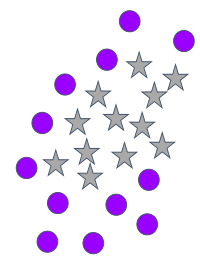

In [11]:
Image('img/cnn.png', width='20%')

In [12]:
%%time
сondensedNearestNeighbour = CondensedNearestNeighbour(sampling_strategy='auto', random_state=1, n_neighbors=1, n_jobs=-1)  
сondensedNearestNeighbour_X, сondensedNearestNeighbour_y = сondensedNearestNeighbour.fit_resample(orig_data_X, orig_data_y)

Wall time: 6.37 s


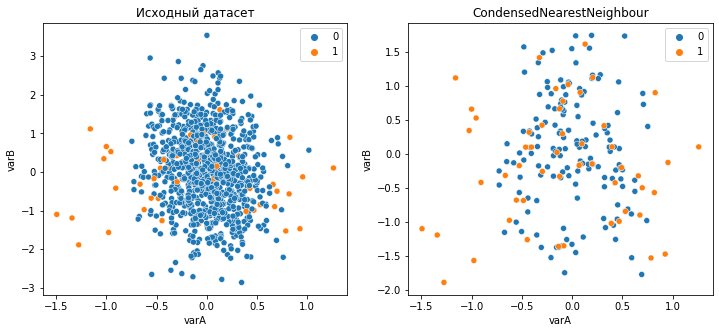

In [13]:
show_sampled_scatter(orig_data_X, orig_data_y, сondensedNearestNeighbour_X, сondensedNearestNeighbour_y, 'CondensedNearestNeighbour')

In [14]:
сondensedNearestNeighbour_y.value_counts()

0    148
1     53
dtype: int64

### Tomek Links

Метод группы Cleaning. Описание работы метода приведено в [статье.](https://www.semanticscholar.org/paper/Two-Modifications-of-CNN-Tomek/090a6772a1d69f07bfe7e89f99934294a0dac1b9)

- Если два ближайших соседа относятся к различным классам, то они являются связью (парой) типа "Tomek Link".
- Из каждой пары можно удалить или только объект доминирующего класса, или оба объекта.

**Преимущества:**
- Расширяет "разделяющую полосу" между классами, что позволяет более четко выделять классы.

**Недостатки:**
- Могут удаляться важные для классификации объекты на "разделяющей полосе", например те, которые могли бы быть "опорными векторами" в методе SVM.

**Реализация:** с использованием класса [TomekLinks.](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.TomekLinks.html)

Схема работы метода:

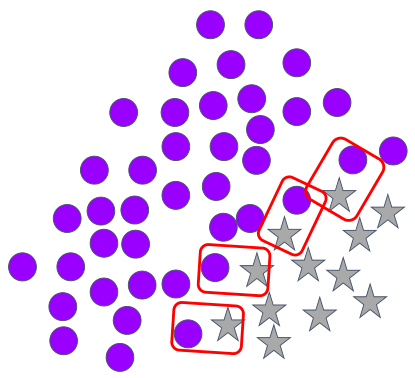

In [15]:
Image('img/tl1.png', width='30%')

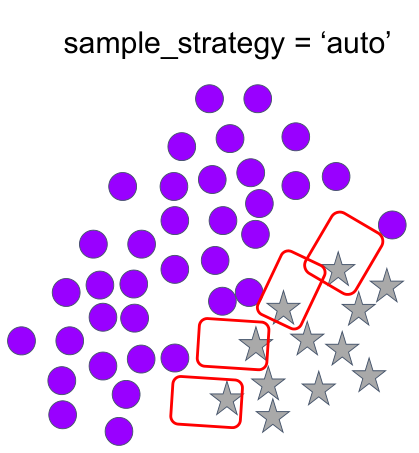

In [16]:
Image('img/tl2.png', width='30%')

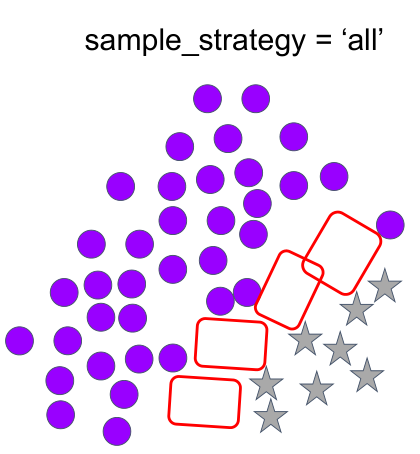

In [17]:
Image('img/tl3.png', width='30%')

In [18]:
%%time
tomekLinks = TomekLinks(sampling_strategy='auto', n_jobs=-1)  
tomekLinks_X, tomekLinks_y = tomekLinks.fit_resample(orig_data_X, orig_data_y)

Wall time: 16 ms


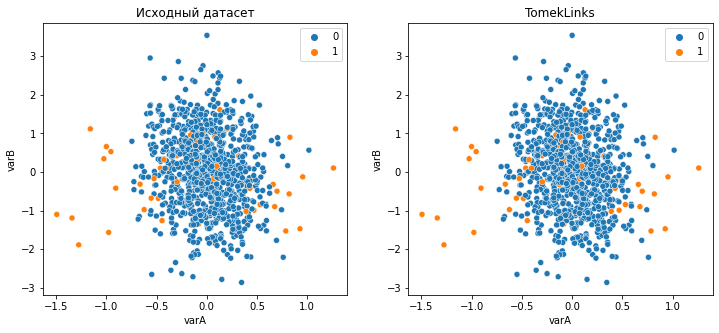

In [19]:
show_sampled_scatter(orig_data_X, orig_data_y, tomekLinks_X, tomekLinks_y, 'TomekLinks')

In [20]:
tomekLinks_y.value_counts()

0    929
1     53
dtype: int64

### One Sided Selection

Метод группы Cleaning. Описание работы метода приведено в [статье.](https://sci2s.ugr.es/keel/pdf/algorithm/congreso/kubat97addressing.pdf)

Последовательно применяет методы Condensed Nearest Neighbours (CNN) и Tomek Links.

Пытается еще сильнее отделить классы друг от друга.

**Реализация:** с использованием класса [OneSidedSelection.](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.OneSidedSelection.html)

In [21]:
%%time
oneSidedSelection = OneSidedSelection(sampling_strategy='auto', n_neighbors=1, random_state=1, n_jobs=-1)  
oneSidedSelection_X, oneSidedSelection_y = oneSidedSelection.fit_resample(orig_data_X, orig_data_y)

Wall time: 55.8 ms


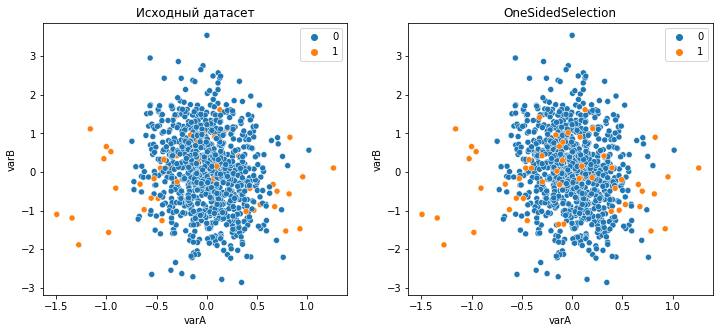

In [22]:
show_sampled_scatter(orig_data_X, orig_data_y, oneSidedSelection_X, oneSidedSelection_y, 'OneSidedSelection')

In [23]:
oneSidedSelection_y.value_counts()

0    918
1     53
dtype: int64

### Edited Nearest Neighbours

Метод группы Cleaning.

1. В качестве обучающей выборки для KNN используется полная выборка с major- и minor-классами.
2. Для каждого объекта из major-класса применяется метод ближайших соседей (как правило, К=3) и анализируется список соседей. Далее возможны две стратегии:
    1. Если большинство соседей принадлежит к одному классу, то объект остается, иначе объект удаляется (`kind_sel='mode'`).
    1. Если все соседи принадлежат к одному классу, то объект остается, иначе объект удаляется (`kind_sel='all'`).
3. Удаляются объекты доминирующего класса на "разделяющей полосе".
4. Метод "противоположен" Condensed Nearest Neighbours.
    
**Преимущества:**
- Расширяет "разделяющую полосу" между классами, что позволяет более четко выделять классы.

**Недостатки:**
- Могут удаляться важные для классификации объекты на "разделяющей полосе", например те, которые могли бы быть "опорными векторами" в методе SVM.

**Реализация:** с использованием класса [EditedNearestNeighbours.](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.EditedNearestNeighbours.html)

In [24]:
%%time
editedNearestNeighbours1 = EditedNearestNeighbours(sampling_strategy='auto', kind_sel='all', n_neighbors=3, n_jobs=-1)  
editedNearestNeighbours1_X, editedNearestNeighbours1_y = editedNearestNeighbours1.fit_resample(orig_data_X, orig_data_y)

Wall time: 16 ms


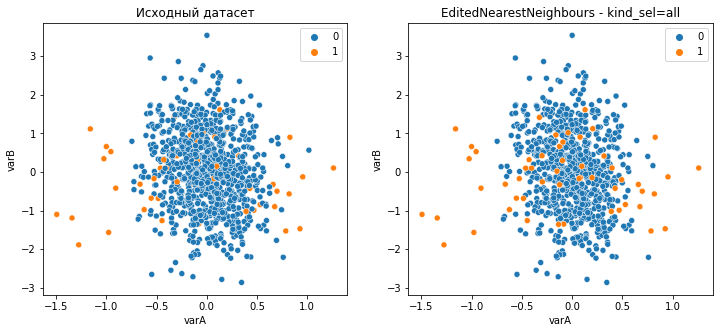

In [25]:
show_sampled_scatter(orig_data_X, orig_data_y, editedNearestNeighbours1_X, editedNearestNeighbours1_y, 'EditedNearestNeighbours - kind_sel=all')

In [26]:
editedNearestNeighbours1_y.value_counts()

0    837
1     53
dtype: int64

In [27]:
%%time
editedNearestNeighbours2 = EditedNearestNeighbours(sampling_strategy='auto', kind_sel='mode', n_neighbors=3, n_jobs=-1)  
editedNearestNeighbours2_X, editedNearestNeighbours2_y = editedNearestNeighbours2.fit_resample(orig_data_X, orig_data_y)

Wall time: 50.9 ms


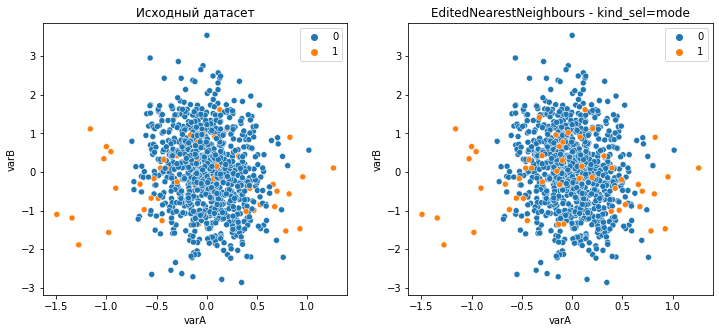

In [28]:
show_sampled_scatter(orig_data_X, orig_data_y, editedNearestNeighbours2_X, editedNearestNeighbours2_y, 'EditedNearestNeighbours - kind_sel=mode')

In [29]:
editedNearestNeighbours2_y.value_counts()

0    940
1     53
dtype: int64

### Repeated Edited Nearest Neighbours

Метод группы Cleaning.

- Расширяет метод Edited Nearest Neighbours.
- Действия метода Edited Nearest Neighbours повторяются до тех пор, пока не появляется новых данных для удаления, или не достигнуто максимальное количество итераций.

Более устойчивый результат по сравнению с Edited Nearest Neighbours.

**Реализация:** с использованием класса [RepeatedEditedNearestNeighbours.](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.RepeatedEditedNearestNeighbours.html)

In [30]:
%%time
editedRepeatedNearestNeighbours1 = RepeatedEditedNearestNeighbours(sampling_strategy='auto', kind_sel='all', n_neighbors=3, n_jobs=-1)  
editedRepeatedNearestNeighbours1_X, editedRepeatedNearestNeighbours1_y = editedRepeatedNearestNeighbours1.fit_resample(orig_data_X, orig_data_y)

Wall time: 46.8 ms


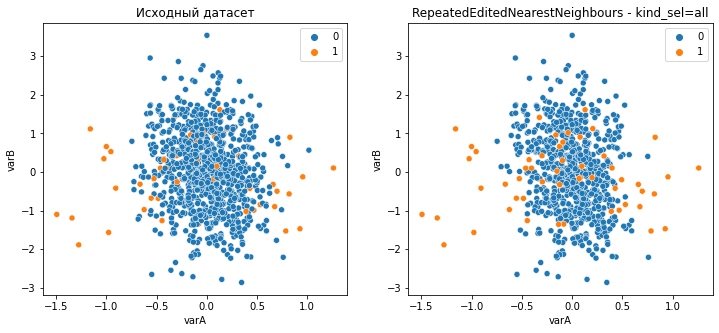

In [31]:
show_sampled_scatter(orig_data_X, orig_data_y, editedRepeatedNearestNeighbours1_X, editedRepeatedNearestNeighbours1_y, 'RepeatedEditedNearestNeighbours - kind_sel=all')

In [32]:
editedRepeatedNearestNeighbours1_y.value_counts()

0    801
1     53
dtype: int64

In [33]:
%%time
editedRepeatedNearestNeighbours2 = RepeatedEditedNearestNeighbours(sampling_strategy='auto', kind_sel='mode', n_neighbors=3, n_jobs=-1)  
editedRepeatedNearestNeighbours2_X, editedRepeatedNearestNeighbours2_y = editedRepeatedNearestNeighbours2.fit_resample(orig_data_X, orig_data_y)

Wall time: 179 ms


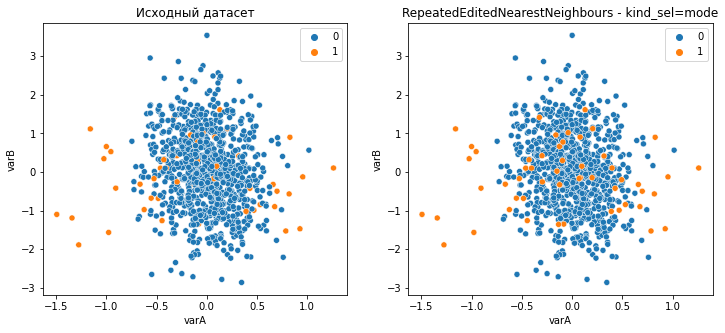

In [34]:
show_sampled_scatter(orig_data_X, orig_data_y, editedRepeatedNearestNeighbours2_X, editedRepeatedNearestNeighbours2_y, 'RepeatedEditedNearestNeighbours - kind_sel=mode')

In [35]:
editedRepeatedNearestNeighbours2_y.value_counts()

0    937
1     53
dtype: int64

### All KNN

Метод группы Cleaning.

- Расширяет метод Repeated Edited Nearest Neighbours.
- Как и в случае Repeated Edited Nearest Neighbours, действия метода Edited Nearest Neighbours повторяются до тех пор, пока не появляется новых данных для удаления, или не достигнуто максимальное количество итераций. Но на каждой итерации число ближайших соседей увеличивается на 1.

Более устойчивый результат по сравнению с Repeated Edited Nearest Neighbours.

**Реализация:** с использованием класса [AllKNN.](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.AllKNN.html)

In [36]:
%%time
allKNN1 = AllKNN(sampling_strategy='auto', kind_sel='all', n_neighbors=3, n_jobs=-1)  
allKNN1_X, allKNN1_y = allKNN1.fit_resample(orig_data_X, orig_data_y)

Wall time: 33.9 ms


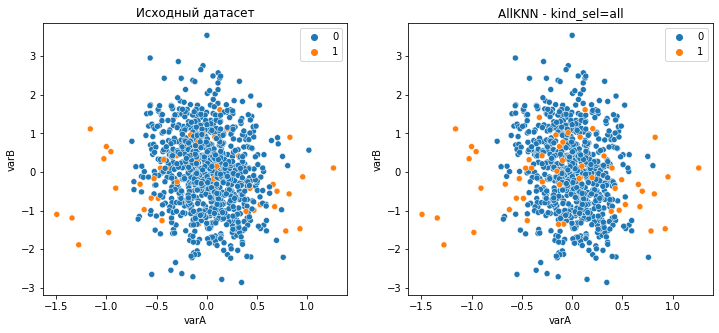

In [37]:
show_sampled_scatter(orig_data_X, orig_data_y, allKNN1_X, allKNN1_y, 'AllKNN - kind_sel=all')

In [38]:
allKNN1_y.value_counts()

0    817
1     53
dtype: int64

In [39]:
%%time
allKNN2 = AllKNN(sampling_strategy='auto', kind_sel='mode', n_neighbors=3, n_jobs=-1)  
allKNN2_X, allKNN2_y = allKNN2.fit_resample(orig_data_X, orig_data_y)

Wall time: 128 ms


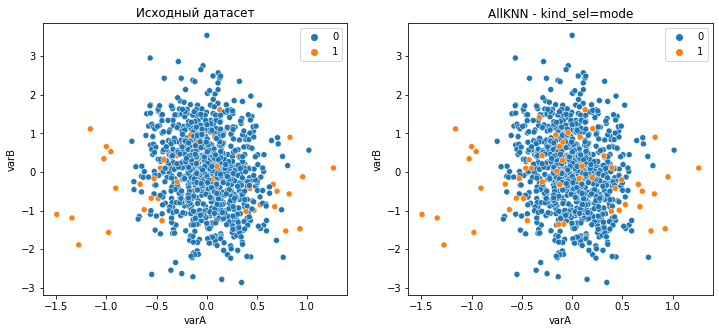

In [40]:
show_sampled_scatter(orig_data_X, orig_data_y, allKNN2_X, allKNN2_y, 'AllKNN - kind_sel=mode')

In [41]:
allKNN2_y.value_counts()

0    911
1     53
dtype: int64

### Neighbourhood Cleaning Rule

Метод группы Cleaning.

- Устраняет "зашумленные значения" и значения вблизи границы классов.
- На всем датасете обучается KNN(K=3). Удаляются значения major-класса, которые не совпадают с предсказаниями по трем ближайшим соседям KNN(K=3).
- На всем датасете обучается KNN(K=1). Удаляются значения major-класса, которые не совпадают с предсказаниями по ближайшему соседу KNN(K=1), как правило это значения на границе классов.

**Реализация:** с использованием класса [NeighbourhoodCleaningRule.](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NeighbourhoodCleaningRule.html)

In [42]:
%%time
neighbourhoodCleaningRule = NeighbourhoodCleaningRule(sampling_strategy='auto', n_jobs=-1)  
neighbourhoodCleaningRule_X, neighbourhoodCleaningRule_y = neighbourhoodCleaningRule.fit_resample(orig_data_X, orig_data_y)

Wall time: 54.9 ms


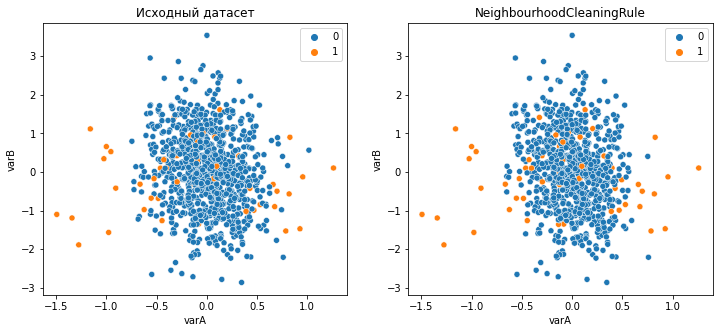

In [43]:
show_sampled_scatter(orig_data_X, orig_data_y, neighbourhoodCleaningRule_X, neighbourhoodCleaningRule_y, 'NeighbourhoodCleaningRule')

In [44]:
neighbourhoodCleaningRule_y.value_counts()

0    839
1     53
dtype: int64

### Instance Hardness Threshold

Может использоваться как Fixed (при задании размера выборки) или как  Cleaning (при задании порога уверенности).

- Строит предсказание на основе модели классификации с использованием кросс-валидации (по умолчанию 5 фолдов).
- Оставляет правильно предсказанные объекты major-класса с наиболее высокими вероятностями предсказания.
- Могут использоваться различные модели классификации, по умолчанию применяется случайный лес.

**Реализация:** с использованием класса [InstanceHardnessThreshold.](https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.InstanceHardnessThreshold.html)

In [45]:
iht = InstanceHardnessThreshold(
    estimator=RandomForestClassifier(n_estimators=100, random_state=1),
    sampling_strategy='auto', 
    random_state=1,
    n_jobs=-1, cv=3)
iht_X, iht_y = iht.fit_resample(orig_data_X, orig_data_y)

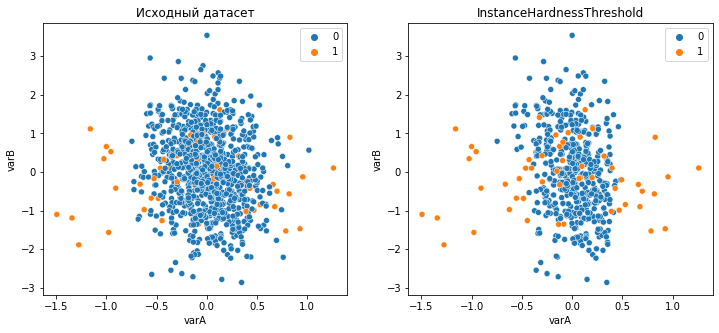

In [46]:
show_sampled_scatter(orig_data_X, orig_data_y, iht_X, iht_y, 'InstanceHardnessThreshold')

In [47]:
iht_y.value_counts()

0    508
1     53
dtype: int64

### Сравнение результатов

In [48]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.05, a-0.05, str(round(b,3)), color='white')
        plt.show()    

In [49]:
us_clas_models_dict = {'LogR': LogisticRegression(max_iter=1000, random_state=1), 
                    'SVC': SVC(probability=True),
                    'KNN_5': KNeighborsClassifier(n_neighbors=5),
                    'Tree': DecisionTreeClassifier(random_state=1),
                    'GB': GradientBoostingClassifier(random_state=1),
                    'RF': RandomForestClassifier(n_estimators=200, random_state=1)}

In [50]:
us_data_list = [
    ('Original', orig_data_X, orig_data_y),
    ('RandomUnderSampler', randomUnderSampler_X, randomUnderSampler_y),
    ('CondensedNearestNeighbour', сondensedNearestNeighbour_X, сondensedNearestNeighbour_y),
    ('TomekLinks', tomekLinks_X, tomekLinks_y),
    ('OneSidedSelection', oneSidedSelection_X, oneSidedSelection_y),
    ('EditedNearestNeighbours - kind_sel=all', editedNearestNeighbours1_X, editedNearestNeighbours1_y),
    ('EditedNearestNeighbours - kind_sel=mode', editedNearestNeighbours2_X, editedNearestNeighbours2_y),
    ('RepeatedEditedNearestNeighbours - kind_sel=all', editedRepeatedNearestNeighbours1_X, editedRepeatedNearestNeighbours1_y),
    ('RepeatedEditedNearestNeighbours - kind_sel=mode', editedRepeatedNearestNeighbours2_X, editedRepeatedNearestNeighbours2_y),
    ('AllKNN - kind_sel=all', allKNN1_X, allKNN1_y),
    ('AllKNN - kind_sel=mode', allKNN2_X, allKNN2_y),
    ('NeighbourhoodCleaningRule', neighbourhoodCleaningRule_X, neighbourhoodCleaningRule_y),
    ('InstanceHardnessThreshold', iht_X, iht_y)
]

In [51]:
def us_test_models():
    logger = MetricLogger()
    for model_name, model in tqdm.tqdm(us_clas_models_dict.items()):
        for data_name, X_data, y_data in us_data_list:
            scores = cross_val_score(model, X_data, y_data, 
                                     cv=3, scoring='roc_auc_ovr_weighted')
            logger.add(data_name, model_name, np.mean(scores))
    return logger

In [52]:
us_logger = us_test_models()

100%|██████████| 6/6 [00:17<00:00,  2.90s/it]


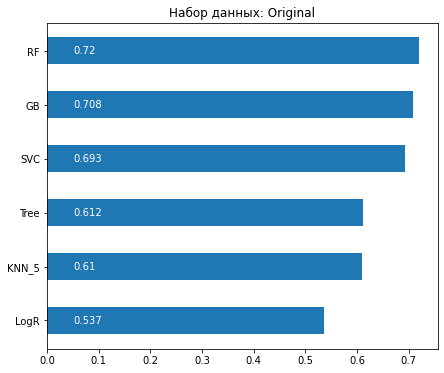

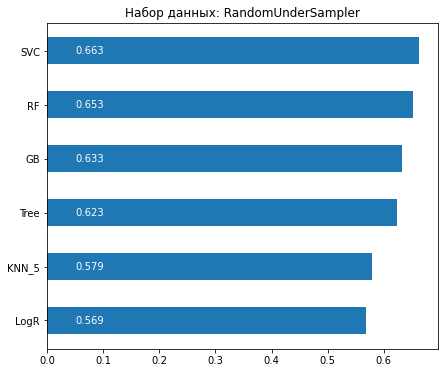

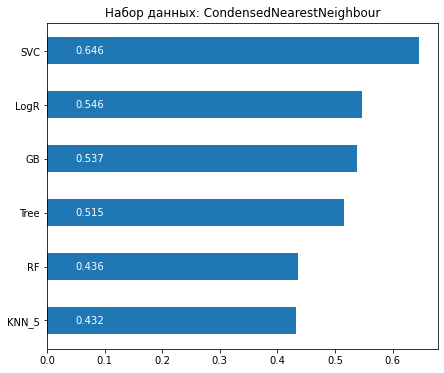

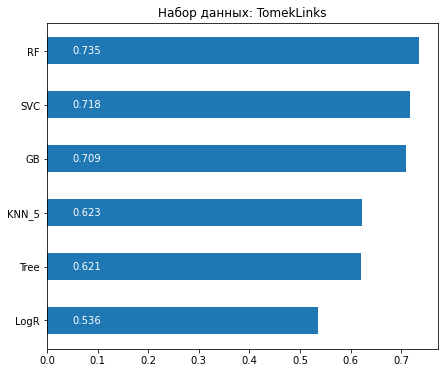

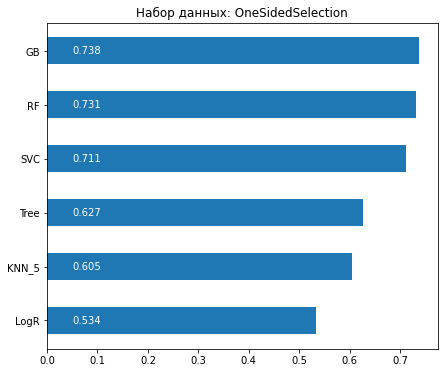

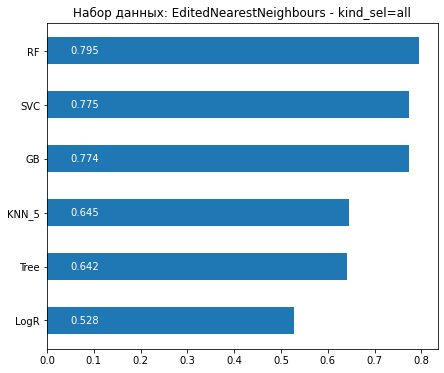

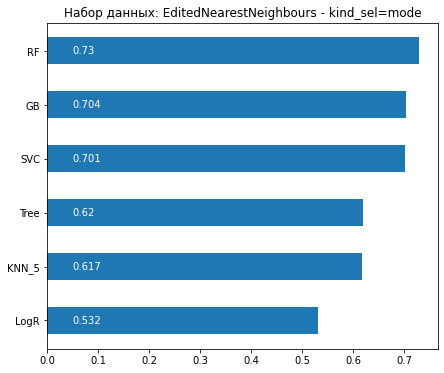

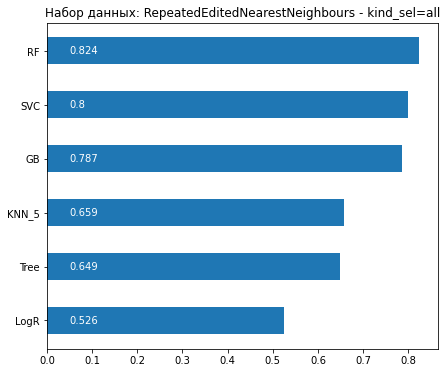

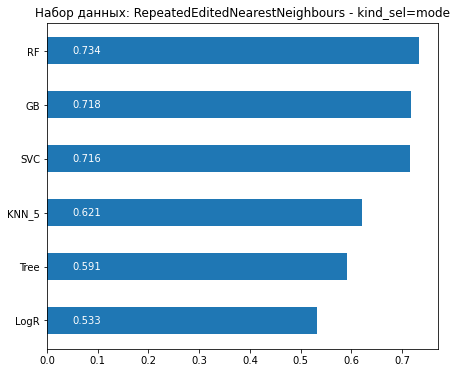

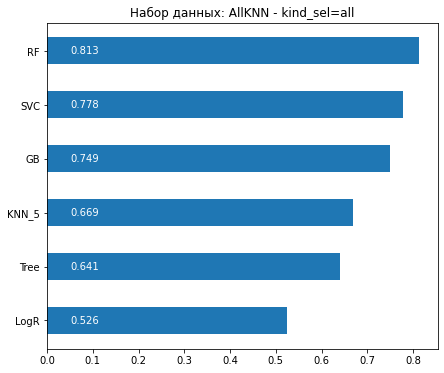

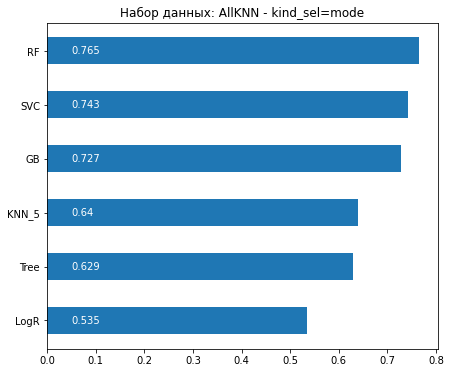

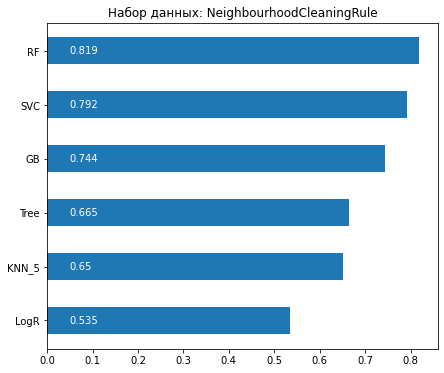

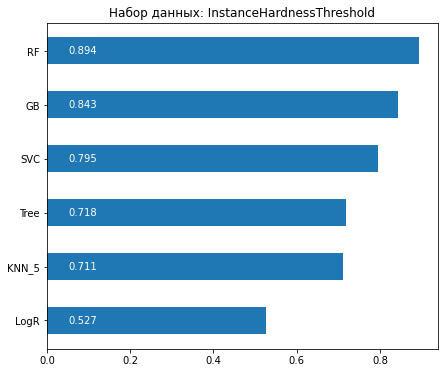

In [53]:
for data_name, _, _ in us_data_list:
    us_logger.plot('Набор данных: ' + data_name, data_name, figsize=(7, 6))

**Выводы:**
- На исходном датасете (без Under-sampling) результаты достаточно плохие.
- Разные методы Under-sampling показывают достаточно большой разброс  результатов, поэтому на различных датасетах необходимо пробовать разные методы Under-sampling.
- Почти везде лучшей моделью оказывается случайный лес, поскольку датасет очень простой, то скорее всего остальные модели переобучаются.

## [Группа методов Over-sampling](https://imbalanced-learn.org/stable/over_sampling.html)

**Over-sampling - увеличение количества объектов minor-класса.**

- Методы данной группы необходимо применять при очень малых объемах minor-класса(ов).
- В выборку искусственно вносятся данные, которых изначально в ней не было. Следует сделить за тем, чтобы не менялись распределения признаков.

### Random Over-sampling

Объекты minor-класса добавляются случайным образом, пока не выполнится условие $IR=K_{Fixed}$.

**Преимущества:**
- Простой и быстрый метод.

**Недостатки:**
- Повторяются одинаковые данные.

**Реализация:** с использованием класса [RandomOverSampler.](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.RandomOverSampler.html)

In [54]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=1)
ros_X, ros_y = ros.fit_resample(orig_data_X, orig_data_y)

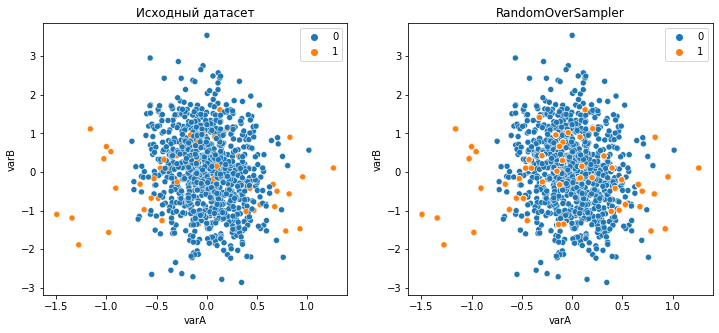

In [55]:
show_sampled_scatter(orig_data_X, orig_data_y, ros_X, ros_y, 'RandomOverSampler')

In [56]:
ros_y.value_counts()

1    947
0    947
dtype: int64

### Synthetic Minority Over-sampling Technique (SMOTE)

Объекты minor-класса добавляются на основе интерполяции ближайших соседей. Цель - сгенерировать правдоподобные объекты.

**Преимущества:**
- Данные не повторяются.

**Недостатки:**
- Генерируются синтетические данные, которых не было в исходной выборке.
- Метод используется только для числовых признаков.

**Реализация:** с использованием класса [SMOTE.](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html)

Принцип работы метода:

- Для произвольного объекта выбираются ближайшие соседи (как правило, К=5).
- Для каждой пары объект-сосед генерируется новый объект на основе формулы:

$$ \text{новый объект} = \text{объект} - \text{масштаб} \cdot (\text{объект} - \text{сосед}) $$

Графическая интерпретация:

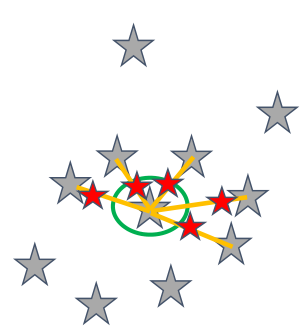

In [57]:
Image('img/smote1.png', width='40%')

**Пример:**

$$ \text{объект}=<4,7> $$
$$ \text{сосед}=<6,8> $$
$$ \text{масштаб}=0.8 $$

Тогда: 

$$ \text{новый объект} = \text{объект} - \text{масштаб} \cdot (\text{объект} - \text{сосед}) $$

$$ \text{новый объект} = <4,7> - 0.8 \cdot (<4,7> - <6,8>) $$
$$ \text{новый объект} = <4,7> - 0.8 \cdot (<-2,-1>) $$
$$ \text{новый объект} = <4,7> - (<-1.6,-0.8>) $$
$$ \text{новый объект} = <5.6,7.8> $$

Графическая интерпретация:

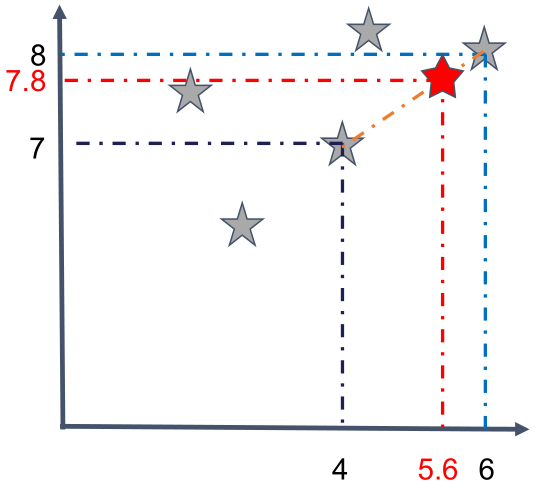

In [58]:
Image('img/smote2.png', width='40%')

In [59]:
sm = SMOTE(
    sampling_strategy='auto',
    random_state=1, 
    k_neighbors=5,
    n_jobs=-1
)
sm_X, sm_y = sm.fit_resample(orig_data_X, orig_data_y)

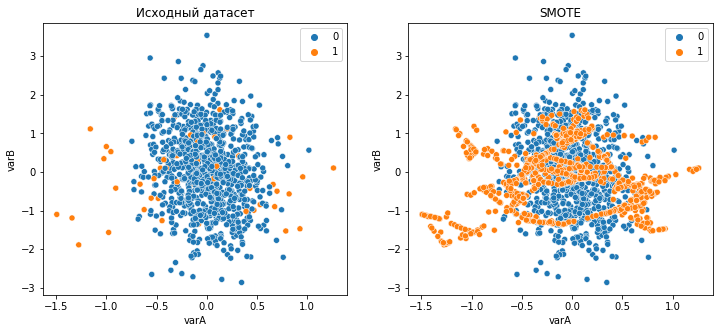

In [60]:
show_sampled_scatter(orig_data_X, orig_data_y, sm_X, sm_y, 'SMOTE')

In [61]:
sm_y.value_counts()

1    947
0    947
dtype: int64

### Borderline-SMOTE

Расширение SMOTE, которое использует для создания новых объектов только те объекты minor-класса, которые располагаются недалеко от границы с major-классом.

- Обучает KNN на всей выборке и ищет объекты minor-класса, все ближайшие соседи которого относятся к major-классу. Эта группа объектов называется DANGER-группой.
- Обучает KNN на всех объектах minor-класса. Далее существуют два варианта алгоритма:
- `kind='borderline-1'`. Для интерполяции используются объекты DANGER-группы, а в качестве соседей объекты minor-класса.
- `kind='borderline-2'`. Для интерполяции используются объекты DANGER-группы, а в качестве соседей объекты как minor-, так и major-классов.

**Реализация:** с использованием класса [BorderlineSMOTE.](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.BorderlineSMOTE.html)

In [62]:
sm_b1 = BorderlineSMOTE(
    sampling_strategy='auto',  
    random_state=1,  
    k_neighbors=5,
    m_neighbors=10, # число соседей для DANGER-объектов
    kind='borderline-1',
    n_jobs=-1
)
sm_b1_X, sm_b1_y = sm_b1.fit_resample(orig_data_X, orig_data_y)

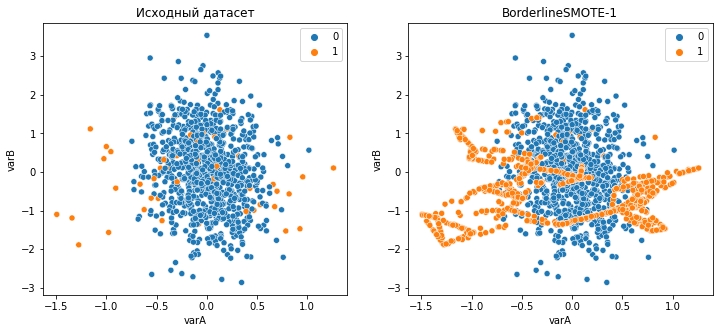

In [63]:
show_sampled_scatter(orig_data_X, orig_data_y, sm_b1_X, sm_b1_y, 'BorderlineSMOTE-1')

In [64]:
sm_b1_y.value_counts()

1    947
0    947
dtype: int64

In [65]:
sm_b2 = BorderlineSMOTE(
    sampling_strategy='auto',  
    random_state=1,  
    k_neighbors=5,
    m_neighbors=10, # число соседей для DANGER-объектов
    kind='borderline-2',
    n_jobs=-1
)
sm_b2_X, sm_b2_y = sm_b2.fit_resample(orig_data_X, orig_data_y)

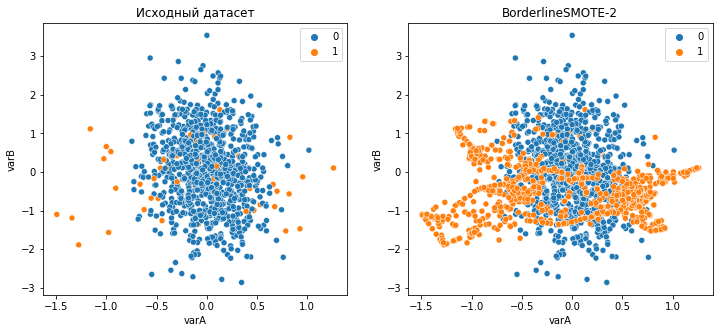

In [66]:
show_sampled_scatter(orig_data_X, orig_data_y, sm_b2_X, sm_b2_y, 'BorderlineSMOTE-2')

In [67]:
sm_b2_y.value_counts()

1    947
0    947
dtype: int64

### SVM-SMOTE

Расширение SMOTE на основе опорных векторов.

- Поиск опорных векторов среди объектов minor-класса.
- Обучение KNN(K=m_neighbors).
- Для пары опорный вектор-сосед генерируется новый объект на основе формулы:

$$ \text{новый объект} = \text{опорный вектор} - \text{масштаб} \cdot (\text{опорный вектор} - \text{сосед}) $$

**Реализация:** с использованием класса [SVMSMOTE.](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SVMSMOTE.html)

In [68]:
svm_sm = SVMSMOTE(
    sampling_strategy='auto',  
    random_state=1, 
    k_neighbors=5,
    m_neighbors=10,
    n_jobs=-1,
    svm_estimator = SVC()
)
svm_sm_X, svm_sm_y = svm_sm.fit_resample(orig_data_X, orig_data_y)

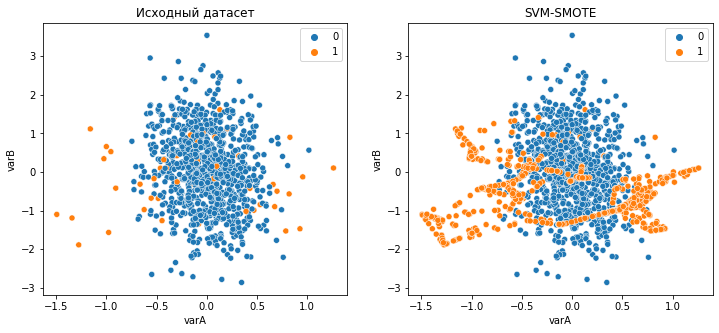

In [69]:
show_sampled_scatter(orig_data_X, orig_data_y, svm_sm_X, svm_sm_y, 'SVM-SMOTE')

In [70]:
svm_sm_y.value_counts()

0    947
1    648
dtype: int64

### KMeansSMOTE

Расширение SMOTE на основе кластеризации (KMeans). Описание работы метода приведено в [статье.](https://arxiv.org/abs/1711.00837)

- Осуществляется поиск кластеров с использованием алгоритма KMeans (количество кластеров К задается как гиперпараметр).
- Определяется плотность кластеров, на основе плотности вычисляется количество генерируемых объектов в каждом кластере.
- Новые объекты внутри кластеров генерируются с помощью SMOTE.

**Реализация:** с использованием класса [KMeansSMOTE.](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.KMeansSMOTE.html)

In [71]:
kms_sm = KMeansSMOTE(
    sampling_strategy='auto',  
    random_state=1,  
    k_neighbors=2,
    n_jobs=-1,
    kmeans_estimator=KMeans(n_clusters=5, random_state=1),
    cluster_balance_threshold=0.01,
    density_exponent='auto'    
)
kms_sm_X, kms_sm_y = kms_sm.fit_resample(orig_data_X, orig_data_y)

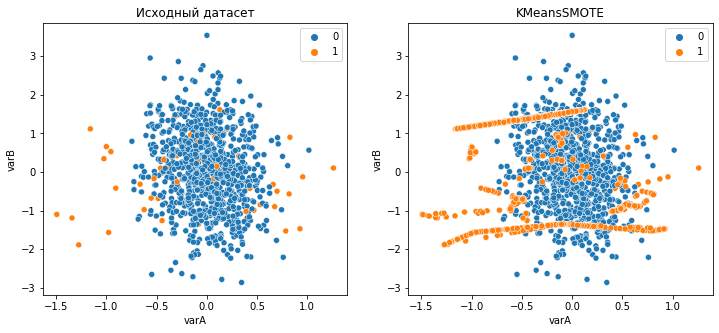

In [72]:
show_sampled_scatter(orig_data_X, orig_data_y, kms_sm_X, kms_sm_y, 'KMeansSMOTE')

In [73]:
kms_sm_y.value_counts()

1    950
0    947
dtype: int64

### Расширения SMOTE для работы с категориальными переменными

- Если все переменные являются категориальными, то можно использовать класс [SMOTE-N.](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTEN.html)
- Для смешанного датасета, который содержит как числовые, так и категориальные переменные, можно использовать класс [SMOTE-NC.](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html)
- Выбираются категории, которые наиболее часто встречаются у соседей.

### Adaptive Synthetic algorithm (ADASYN)

Идея алгоритма отчасти напоминает SMOTE, но есть существенные отличия.

- Шаг 1. Вычисление IR:

$$ \text{imbalance ratio (IR)} = \frac{len(Y_{minor})}{len(Y_{major})} $$

- Шаг 2. Вычисление количества генерируемых объектов:

$$ G = \left(len(Y_{major}) - len(Y_{minor})\right) \cdot \text{масштаб} $$

$\text{масштаб}$ как правило равен 1.

- Шаг 3. 
    - Обучение KNN на всем датасете (а не только на minor-классе как в случае SMOTE).
    - Поиск К ближайших соседей для всех объектов minor-класса.
    - Вычисление веса $r=\frac{\text{количество соседей major-класса}}{\text{общее количество соседей}}$
    
- Шаг 4. Нормализация $r$. 

$$r_{norm} = \frac{r}{sum(r)}$$

- Шаг 5. Определение количества новых объектов $g_i$, которые будут сгенерированы для каждого i-го объекта minor-класса.

$$ g_i = r_i \cdot G $$

- Шаг 6. Для каждого i-го объекта генерируется $g_i$ примеров на основе формулы:

$$ \text{новый объект} = \text{объект} - \text{масштаб} \cdot (\text{объект} - \text{сосед}) $$

Формула полностью совпадает с формулой из метода SMOTE, но, в отличие от SMOTE, сосед может принадлежать как к minor-, так и к major-классам.

**Реализация:** с использованием класса [ADASYN.](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.ADASYN.html)

In [74]:
%%time
adasyn = ADASYN(
    sampling_strategy='auto', 
    random_state=1,  
    n_neighbors=5,
    n_jobs=-1
)
adasyn_X, adasyn_y = adasyn.fit_resample(orig_data_X, orig_data_y)

Wall time: 21.9 ms


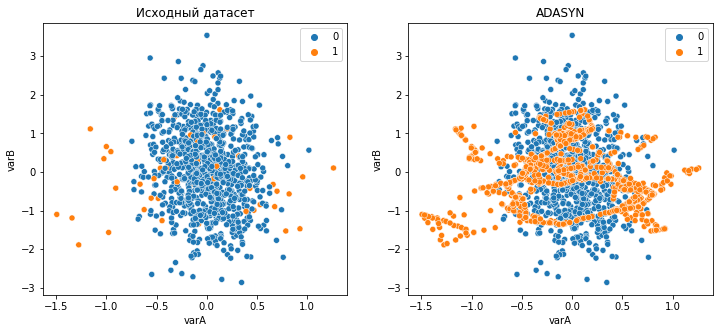

In [75]:
show_sampled_scatter(orig_data_X, orig_data_y, adasyn_X, adasyn_y, 'ADASYN')

In [76]:
adasyn_y.value_counts()

1    953
0    947
dtype: int64

### Сравнение результатов

In [77]:
os_clas_models_dict = {'LogR': LogisticRegression(max_iter=1000, random_state=1), 
                    'SVC': SVC(probability=True),
                    'KNN_5': KNeighborsClassifier(n_neighbors=5),
                    'Tree': DecisionTreeClassifier(random_state=1),
                    'GB': GradientBoostingClassifier(random_state=1),
                    'RF': RandomForestClassifier(n_estimators=200, random_state=1)}

In [78]:
os_data_list = [
    ('Original', orig_data_X, orig_data_y),
    ('RandomOverSampler', ros_X, ros_y),
    ('SMOTE', sm_X, sm_y),
    ('BorderlineSMOTE-1', sm_b1_X, sm_b1_y),
    ('BorderlineSMOTE-2', sm_b2_X, sm_b2_y),
    ('SVM-SMOTE', svm_sm_X, svm_sm_y),
    ('KMeansSMOTE', kms_sm_X, kms_sm_y),
    ('ADASYN', adasyn_X, adasyn_y)   
]

In [79]:
def os_test_models():
    logger = MetricLogger()
    for model_name, model in tqdm.tqdm(os_clas_models_dict.items()):
        for data_name, X_data, y_data in os_data_list:
            scores = cross_val_score(model, X_data, y_data, 
                                     cv=3, scoring='roc_auc_ovr_weighted')
            logger.add(data_name, model_name, np.mean(scores))
    return logger

In [80]:
os_logger = os_test_models()

100%|██████████| 6/6 [00:17<00:00,  2.86s/it]


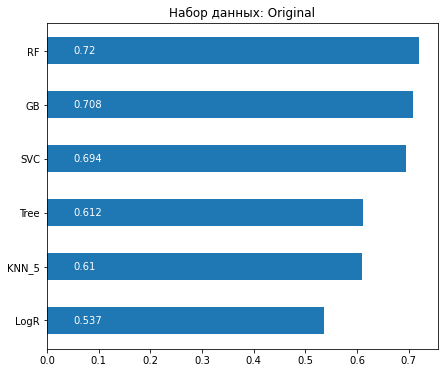

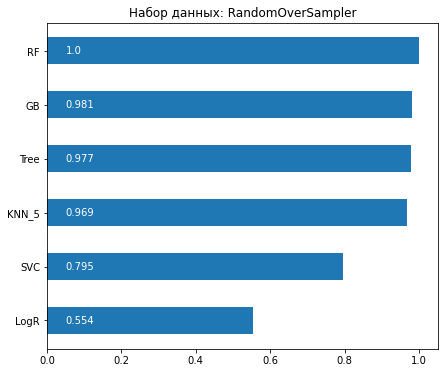

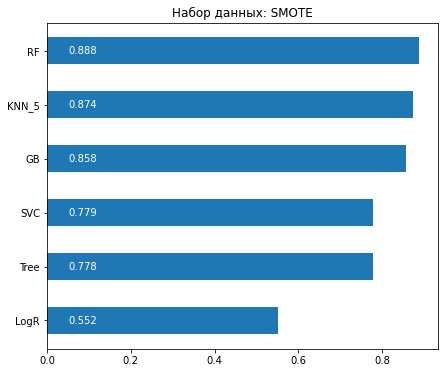

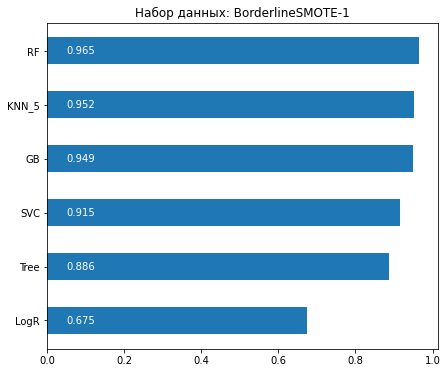

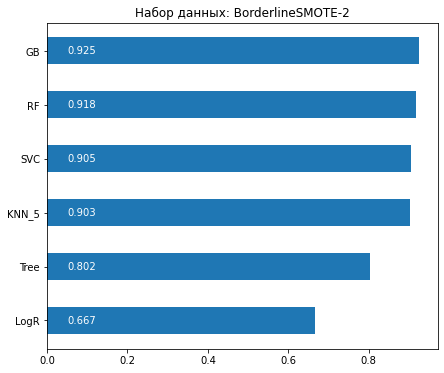

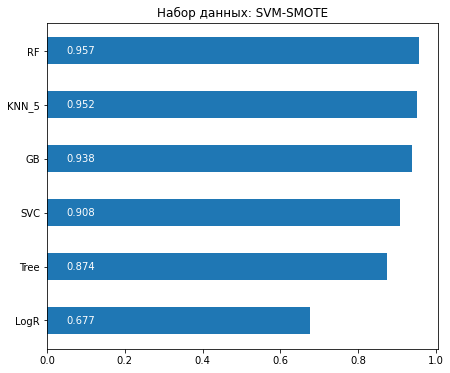

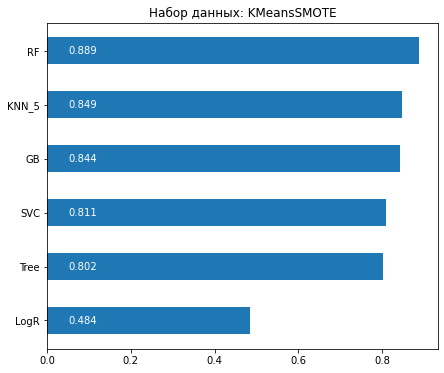

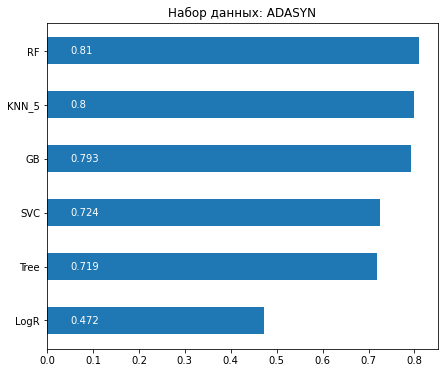

In [81]:
for data_name, _, _ in os_data_list:
    os_logger.plot('Набор данных: ' + data_name, data_name, figsize=(7, 6))

**Выводы:**
- На исходном датасете (без Over-sampling) результаты достаточно плохие.
- Разные методы Over-sampling показывают достаточно большой разброс  результатов, поэтому на различных датасетах необходимо пробовать разные методы Over-sampling.

## Одновременное использование Under-sampling и Over-sampling

Позволяет объединить преимущества обоих подходов.

Одним из наиболее частых вариантов одновременного использования методов является следующий:
1. С использованием SMOTE (или его разновидностей) можно расширить minor-класс. При этом могут быть сгенерированы "зашумленные" объекты.
2. Далее к расширенной выборке применяется метод Edited Nearest Neighbours или Tomek Links, которые устраняют "зашумленные" объекты и объекты, которые сложно классифицировать.

## Ансамблевые методы, построенные с учетом дисбалансированных выборок

В библиотеке imbalanced-learn реализованы [разновидности ансамблевых методов](https://imbalanced-learn.org/dev/ensemble.html) для работы с дисбалансированными выборками.

In [82]:
ens_data_list = [
    ('Original', orig_data_X, orig_data_y)
]

In [83]:
ens_clas_models_dict = {'BRF': BalancedRandomForestClassifier(random_state=1, sampling_strategy=1),
                        'RBC': RUSBoostClassifier(random_state=1, sampling_strategy=1),
                        'Tree': DecisionTreeClassifier(random_state=1),
                        'GB': GradientBoostingClassifier(random_state=1),
                        'RF': RandomForestClassifier(n_estimators=200, random_state=1)}

In [84]:
def ens_test_models():
    logger = MetricLogger()
    for model_name, model in tqdm.tqdm(ens_clas_models_dict.items()):
        for data_name, X_data, y_data in ens_data_list:
            scores = cross_val_score(model, X_data, y_data, 
                                     cv=3, scoring='roc_auc_ovr_weighted')
            logger.add(data_name, model_name, np.mean(scores))
    return logger

In [85]:
ens_logger = ens_test_models()

100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


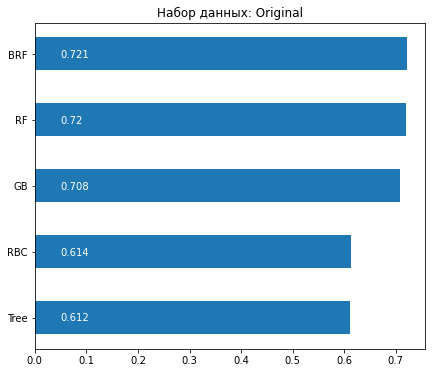

In [86]:
for data_name, _, _ in ens_data_list:
    ens_logger.plot('Набор данных: ' + data_name, data_name, figsize=(7, 6))

**Выводы:**
- Лучшие результаты показывает случайный лес. 
- Сбалансированный вариант случайного леса работает немного лучше несбалансированного.